# Exploring Data with Python

A significant part of a a data scientist's role is to explore, analyze, and visualize data. There's a wide range of tools and programming languages that they can use to do this; and of of the most popular approaches is to use Jupyter notebooks (like this one) and Python.

Python is a flexible programming language that is used in a wide range of scenarios; from web applications to device programming. It's extremely popular in the data science and machine learning community because of the many packages it supports for data analysis and visualization.

In this notebook, we'll explore some of these packages, and apply basic techniques to analyze data. This is not intended to be a comprehensive Python programming exercise; or even a deep dive into data analysis. Rather, it's intended as a crash course in some of the common ways in which data scientists can use Python to work with data.

> **Note**: If you've never used the Jupyter Notebooks environment before, there are a few things you should be aware of:
> 
> - Notebooks are made up of *cells*. Some cells (like this one) contain *markdown* text, while others (like the one beneath this one) contain code.
> - You can run each code cell by using the &#9655 icon at the top left of the cell. Alternatively, you can run all of the cells in the notebook in a single command by using the &#9655&#9655 icon on the toolbar at the top of the notebook (*this toolbar contains additional buttons - you can hold the mouse over each one to see a tooltip describing what it does*).
> - The output from each code cell will be displayed immediately below the cell.
> - Even though the code cells can be run individually, some variables used in the code are global to the notebook. That means that you should run all of the code cells <u>**in order**</u>. There may be dependencies between code cells, so if you skip a cell, subsequent cells might not run correctly.
> - The notebook is connected to a Python *kernel* on a Jupyter server (you can see which one at the top right of the page). If you stop the kernel or disconnect from the server (for example, by closing and reopening the notebook, or ending and resuming your session), the output from cells that have been run will still be displayed; but any variables or functions defined in those cells will have been lost - you must rerun the cells before running any subsequent cells that depend on them.

## Exploring data arrays with NumPy

Lets start by looking at some simple data.

Suppose a college takes a sample of student grades for a data science class.

Run the code in the cell below by clicking its green <span style="color:green">&#9655</span> button (at the top left of the cell) to see the data.

In [1]:
data = [50,50,47,97,49,3,53,42,26,74,82,62,37,15,70,27,36,35,48,52,63,64]
print(data)

[50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64]


The data has been loaded into a Python **list** structure, which is a good data type for general data manipulation, but not optimized for numeric analysis. For that, we're going to use the **NumPy** package, which includes specific data types and functions for working with *Num*bers in *Py*thon.

Run the cell below to load the data into a NumPy **array**.

In [2]:
import numpy as np

grades = np.array(data)
print(grades)

[50 50 47 97 49  3 53 42 26 74 82 62 37 15 70 27 36 35 48 52 63 64]


Just in case you're wondering about the differences between a **list** and a NumPy **array**, let's compare how these data types behave when we use them in an expression that multiplies them by 2.

In [3]:
print (type(data),'x 2:', data * 2)
print('---')
print (type(grades),'x 2:', grades * 2)

<class 'list'> x 2: [50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64, 50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64]
---
<class 'numpy.ndarray'> x 2: [100 100  94 194  98   6 106  84  52 148 164 124  74  30 140  54  72  70
  96 104 126 128]


Note that multiplying a list by 2 creates a new list of twice the length with the original sequence of list elements repeated. Multiplying a NumPy array on the other hand performs an element-wise calculation in which the array behaves like a *vector*, so we end up with an array of the same size in which each element has been multipled by 2.

The key takeaway from this is that NumPy arrays are specifically designed to support mathematical operations on numeric data - which makes them more useful for data analysis than a generic list.

You might have spotted that the class type for the numpy array above is a **numpy.ndarray**. The **nd** indicates that this is a structure that can consists of multiple *dimensions* (it can have *n* dimensions). Our specific instance has a single dimension of student grades.

Run the cell below to view the **shape** of the array.

In [4]:
grades.shape

(22,)

The shape confirms that this array has only one dimension, which contains 22 elements (there are 22 grades in the original list). You can access the individual elements in the array by their zer0-based ordinal position. Let's get the first element (the one in position 0).

In [5]:
grades[0]

50

Alright, now you know your way around a NumPy array, it's time to perform some analysis of the grades data.

You can apply aggregations across the elements in the array, so let's find the simple average grade (in other words, the *mean* grade value).

In [6]:
grades.mean()

49.18181818181818

So the mean grade is just around 50 - more or less in the middle of the possible range from 0 to 100.

Let's add a second set of data for the same students, this time recording the typical number of hours per week they devoted to studying.

In [7]:
# Define an array of study hours
study_hours = [10.0,11.5,9.0,16.0,9.25,1.0,11.5,9.0,8.5,14.5,15.5,
               13.75,9.0,8.0,15.5,8.0,9.0,6.0,10.0,12.0,12.5,12.0]

# Create a 2D array (an array of arrays)
student_data = np.array([study_hours, grades])

# display the array
student_data

array([[10.  , 11.5 ,  9.  , 16.  ,  9.25,  1.  , 11.5 ,  9.  ,  8.5 ,
        14.5 , 15.5 , 13.75,  9.  ,  8.  , 15.5 ,  8.  ,  9.  ,  6.  ,
        10.  , 12.  , 12.5 , 12.  ],
       [50.  , 50.  , 47.  , 97.  , 49.  ,  3.  , 53.  , 42.  , 26.  ,
        74.  , 82.  , 62.  , 37.  , 15.  , 70.  , 27.  , 36.  , 35.  ,
        48.  , 52.  , 63.  , 64.  ]])

Now the data consists of a 2-dimensional array - an array of arrays. Let's look at its shape.

In [8]:
# Show shape of 2D array
student_data.shape

(2, 22)

The **student_data** array contains two elements, each of which is an array containing 22 elements.

To navigate this structure, you need to specify the position of each element in the hierarchy. So to find the first value in the first array (which contains the study hours data), you can use the following code.

In [9]:
# Show the first element of the first element
student_data[0][0]

10.0

Now you have a multidimensional array containing both the student's study time and grade information, which you can use to compare data. For example, how does the mean study time compare to the mean grade?

In [11]:
# Get the mean value of each sub-array
avg_study = student_data[0].mean()
avg_grade = student_data[1].mean()

print('Average study hours: {:.2f}\nAverage grade: {:.2f}'.format(avg_study, avg_grade))

Average study hours: 10.52
Average grade: 49.18


## Exploring tabular data with Pandas

While NumPy provides a lot of the functionality you need to work with numbers, and specifically arrays of numeric values; when you start to deal with two-dimensional tables of data, the **Pandas** package offers a more convenient structure to work with - the **DataFrame**.

Run the following cell to import the Pandas library and create a DataFrame with three columns. The first column is a list of student names, and the second and third columns are the NumPy arrays containing the study time and grade data.

In [12]:
import pandas as pd

df_students = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 
                                     'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny',
                                     'Jakeem','Helena','Ismat','Anila','Skye','Daniel','Aisha'],
                            'StudyHours':student_data[0],
                            'Grade':student_data[1]})

df_students 

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


Note that in addition to the columns you specified, the DataFrame includes an *index* to unique identify each row. We could have specified the index explicitly, and assigned any kind of appropriate value (for example, an email address); but because we didn't specify an index, one has been created with a unique integer value for each row.

### Finding and filtering data in a DataFrame

You can use the DataFrame's **loc** method to retrieve data for a specific index value, like this.

In [13]:
# Get the data for index value 5
df_students.loc[5]

Name          Vicky
StudyHours        1
Grade             3
Name: 5, dtype: object

You can also get the data at a range of index values, like this:

In [14]:
# Get the rows with index values from 0 to 5
df_students.loc[0:5]

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0


In addition to being able to use the **loc** method to find rows based on the index, you can use the **iloc** method to find rows based on their ordinal position in the DataFrame (regardless of the index):

In [15]:
# Get data in the first five rows
df_students.iloc[0:5]

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0


Look carefully at the `iloc[0:5]` results, and compare them to the `loc[0:5]` results you obtained previously. Can you spot the difference?

The **loc** method returned rows with index *label* in the list of values from *0* to *5* - which includes *0*, *1*, *2*, *3*, *4*, and *5* (six rows). However, the **iloc** method returns the rows in the *positions* included in the range 0 to 5, and since integer ranges don't include the upper-bound value, this includes positions *0*, *1*, *2*, *3*, and *4* (five rows).

**iloc** identifies data values in a DataFrame by *position*, which extends beyond rows to columns. So for example, you can use it to find the values for the columns in positions 1 and 2 in row 0, like this:

In [16]:
df_students.iloc[0,[1,2]]

StudyHours    10
Grade         50
Name: 0, dtype: object

Let's return to the **loc** method, and see how it works with columns. Remember that **loc** is used to locate data items based on index values rather than positions. In the absence of an explicit index column, the rows in our dataframe are indexed as integer values, but the columns are identified by name:

In [17]:
df_students.loc[0,'Grade']

50.0

Here's another useful trick. You can use the **loc** method to find indexed rows based on a filtering expression that references named columns other than the index, like this:

In [18]:
df_students.loc[df_students['Name']=='Aisha']

,Name,StudyHours,Grade
21,Aisha,12.0,64.0


Actually, you don't need to explicitly use the **loc** method to do this - you can simply apply a DataFrame filtering expression, like this:

In [19]:
df_students[df_students['Name']=='Aisha']

,Name,StudyHours,Grade
21,Aisha,12.0,64.0


And for good measure, you can achieve the same results by using the DataFrame's **query** method, like this:

In [ ]:
df_students.query('Name=="Aisha"')

The three previous examples underline an occassionally confusing truth about working with Pandas. Often, there are multiple ways to achieve the same results. Another example of this is the way you refer to a DataFrame column name. You can specify the column name as a named index value (as in the `df_students['Name']` examples we've seen so far), or you can use the column as a property of the DataFrame, like this:

In [20]:
df_students[df_students.Name == 'Aisha']

,Name,StudyHours,Grade
21,Aisha,12.0,64.0


### Handling missing values

One of the most common issues data scientists need to deal with is incomplete or missing data.

For example, suppose we add rows for two more students to our dataset.

In [21]:
new_rows = [{'Name':'Bill', 'StudyHours':8},
            {'Name':'Ted',}]
#append rows to the dataframe
df_students = df_students.append(new_rows, ignore_index=True)
df_students

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


Note that the new student records don't include values for all columns. When the DataFrame is retrieved, the missing values show up as **NaN** (*not a number*). These values are used to indicate missing numeric data.

So how would we know that the DataFrame contains missing values? You can use the **isnull** method to identify which individual values are null, like this:

In [22]:
df_students.isnull()

,Name,StudyHours,Grade
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


Of course, with a larger DataFrame, it would be inefficient to review all of the rows and columns individually; so we can get the sum of missing values for each column, like this:

In [23]:
df_students.isnull().sum()

Name          0
StudyHours    1
Grade         2
dtype: int64

So now we know that there's one missing **StudyHours** value, and two missing **Grade** values.

To see them in context, we can filter the dataframe to include only rows where any of the columns (axis 1 of the DataFrame) are null.

In [24]:
df_students[df_students.isnull().any(axis=1)]

,Name,StudyHours,Grade
22,Bill,8.0,NaN
23,Ted,NaN,NaN


So now that we've found the null values, what can we do about them?

One common approach is to *impute* replacement values. For example, if the number of study hours is missing, we could just assume that the student studied for an average amount of time and replace the missing value with the mean study hours. To do this, we can use the **fillna** method, like this:

In [25]:
df_students.StudyHours = df_students.StudyHours.fillna(df_students.StudyHours.mean())
df_students

,Name,StudyHours,Grade
0,Dan,10.000000,50.0
1,Joann,11.500000,50.0
2,Pedro,9.000000,47.0
3,Rosie,16.000000,97.0
4,Ethan,9.250000,49.0
5,Vicky,1.000000,3.0
6,Frederic,11.500000,53.0
7,Jimmie,9.000000,42.0
8,Rhonda,8.500000,26.0
9,Giovanni,14.500000,74.0


Alternatively, it might be important to ensure that you only use data you know to be absolutely correct; so you can drop rows or columns that contains null values by using the **dropna** method. In this case, we'll remove rows (axis 0 of the DataFrame) where any of the columns contain null values.

In [26]:
df_students = df_students.dropna(axis=0, how='any')
df_students

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


### Explore data in the DataFrame

Now that we've cleaned up the missing values, we're ready to explore the data in the DataFrame. Let's start by comparing the mean study hours and grades.

In [27]:
# Get the mean study hours using to column name as an index
mean_study = df_students['StudyHours'].mean()

# Get the mean grade using the column name as a property (just to make the point!)
mean_grade = df_students.Grade.mean()

# Print the mean study hours and mean grade
print('Average weekly study hours: {:.2f}\nAverage grade: {:.2f}'.format(mean_study, mean_grade))

Average weekly study hours: 10.52
Average grade: 49.18


OK, let's filter the DataFrame to find only the students who studied for more than the average amount of time.

In [28]:
# Get students who studied for the mean or more hours
df_students[df_students.StudyHours > mean_study]

,Name,StudyHours,Grade
1,Joann,11.50,50.0
3,Rosie,16.00,97.0
6,Frederic,11.50,53.0
9,Giovanni,14.50,74.0
10,Francesca,15.50,82.0
11,Rajab,13.75,62.0
14,Jenny,15.50,70.0
19,Skye,12.00,52.0
20,Daniel,12.50,63.0
21,Aisha,12.00,64.0


Note that the filtered result is itself a DataFrame, so you can work with its columns just like any other DataFrame.

For example, let's find the average grade for students who undertook more than the average amount of study time.

In [29]:
# What was their mean grade?
df_students[df_students.StudyHours > mean_study].Grade.mean()

66.7

Let's assume that the passing grade for the course is 60.

We can use that information to add a new column to the DataFrame, indicating whether or not each student passed.

In [30]:
df_students['Pass'] = df_students.Grade >= 60

df_students

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


DataFrames are amazingly versatile, and make it easy to manipulate data. Most DataFrame operations return a new copy of the DataFrame; so if you want to modify a DataFrame but keep the existing variable, you need to assign the result of the operation to the existing variable. For example, the following code sorts the student data into descending order of Grade, and assigns the resulting sorted DataFrame to the original **df_students** variable.

In [31]:
# Create a DataFrame with the data sorted by Grade (descending)
df_students = df_students.sort_values('Grade', ascending=False)

# Show the DataFrame
df_students

,Name,StudyHours,Grade,Pass
3,Rosie,16.00,97.0,True
10,Francesca,15.50,82.0,True
9,Giovanni,14.50,74.0,True
14,Jenny,15.50,70.0,True
21,Aisha,12.00,64.0,True
20,Daniel,12.50,63.0,True
11,Rajab,13.75,62.0,True
6,Frederic,11.50,53.0,False
19,Skye,12.00,52.0,False
1,Joann,11.50,50.0,False


## Visualizing data with Matplotlib

DataFrames provide a great way to explore an analyze tabular data, but sometimes a picture is worth a thousand rows and columns. The **Matplotlib** library provides the foundation for plotting data visualizations that can greatly enhance your ability the analyze the data.

Let's start with a simple bar chart that shows the grade of each student.

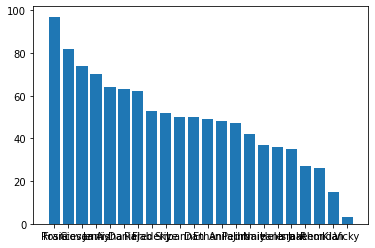

In [32]:
# Ensure plots are displayed inline in the notebook
%matplotlib inline

from matplotlib import pyplot as plt

# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade)

# Display the plot
plt.show()

Well, that worked; but the chart could use some improvements to make it clearer what we're looking at.

Note that you used the **pyplot** class from Matplotlib to plot the chart. This class provides a whole bunch of ways to improve the visual elements of the plot. For example, the following code:

- Specifies the color of the bar chart.
- Adds a title to the chart (so we know what it represents)
- Adds labels to the X and Y (so we know which axis shows which data)
- Adds a grid (to make it easier to determine the values for the bars)
- Rotates the X markers (so we can read them)

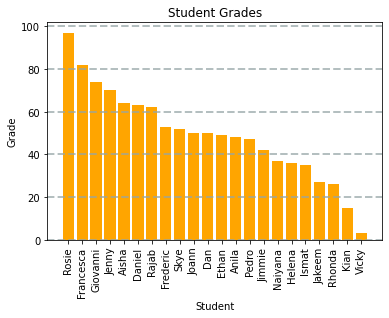

In [33]:
# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade, color='orange')

# Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Display the plot
plt.show()

A plot is technically contained with a **Figure**. In the previous examples, the figure was created implicitly for you; but you can create it explicitly. For example, the following code creates a figure with a specific size.

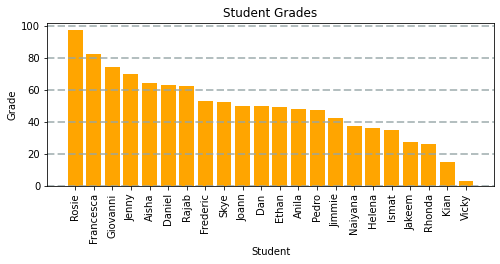

In [34]:
# Create a Figure
fig = plt.figure(figsize=(8,3))

# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade, color='orange')

# Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Show the figure
plt.show()

A figure can contain multiple subplots, each on its own *axis*.

For example, the following code creates a figure with two subplots - one is a bar chart showing student grades, and the other is a pie chart comparing the number of passing grades to non-passing grades.

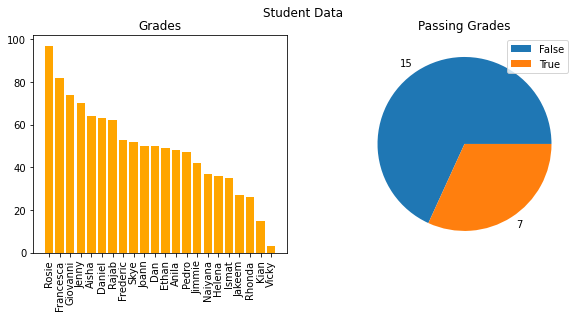

In [35]:
# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Create a bar plot of name vs grade on the first axis
ax[0].bar(x=df_students.Name, height=df_students.Grade, color='orange')
ax[0].set_title('Grades')
ax[0].set_xticklabels(df_students.Name, rotation=90)

# Create a pie chart of pass counts on the second axis
pass_counts = df_students['Pass'].value_counts()
ax[1].pie(pass_counts, labels=pass_counts)
ax[1].set_title('Passing Grades')
ax[1].legend(pass_counts.keys().tolist())

# Add a title to the Figure
fig.suptitle('Student Data')

# Show the figure
fig.show()

Until now, you've used methods of the Matplotlib.pyplot object to plot charts. However, Matplotlib is so foundational to graphics in Python that many packages, including Pandas, provide methods that abstract the underlying Matplotlib functions and simplify plotting. For example, the DataFrame provides its own methods for plotting data, as shown in the following example to plot a bar chart of study hours.

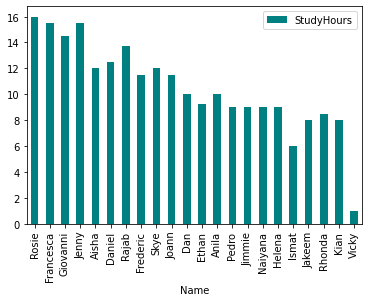

In [36]:
df_students.plot.bar(x='Name', y='StudyHours', color='teal', figsize=(6,4))

## Getting started with statistical analysis

Now that you know how to use Python to manipulate and visualize data, you can start analyzing it.

A lot of data science is rooted in *statistics*, so we'll explore some basic statistical techniques.

> **Note**: This is <u>not</u> intended to teach you statistics - that's much too big a topic for this notebook. It will however introduce you to some statistical concepts and techniques that data scientists use as they explore data in preparation for machine learning modeling.

### Descriptive statistics and data distribution

When examining a *variable* (for example a sample of student grades), data scientists are particularly interested in its *distribution* (in other words, how are all the different grade values spread across the sample). The starting point for this exploration is often to visualize the data as a histogram, and see how frequently each value for the variable occurs.






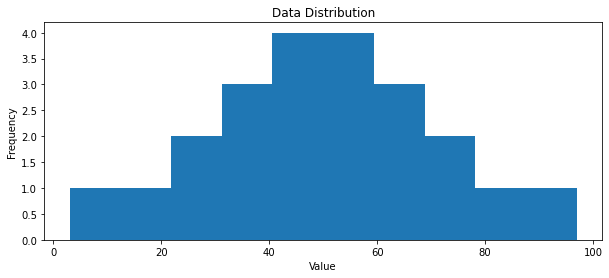

In [37]:
# Get the variable to examine
var_data = df_students['Grade']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var_data)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()

The histogram for grades is a symmetric shape, where the most frequently occuring grades tend to be in the middle of the range (around 50), with fewer grades at the extreme ends of the scale.

#### Measures of central tendency

To understand the distribution better, we can examine so-called *measures of central tendency*; which is a fancy way of describing statistics that represent the "middle" of the data. The goal of this is to try to find a "typical" value. Common ways to define the middle of the data include:

- The *mean*: A simple average based on adding together all of the values in the sample set, and then dividing the total by the number of samples.
- The *median*: The value in the middle of the range of all of the sample values.
- The *mode*: The most commonly occuring value in the sample set<sup>\*</sup>.

Let's calculate these values, along with the minimum and maximum values for comparison, and show them on the histogram.

> <sup>\*</sup>Of course, in some sample sets , there may be a tie for the most common value - in which case the dataset is described as *bimodal* or even *multimodal*.

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



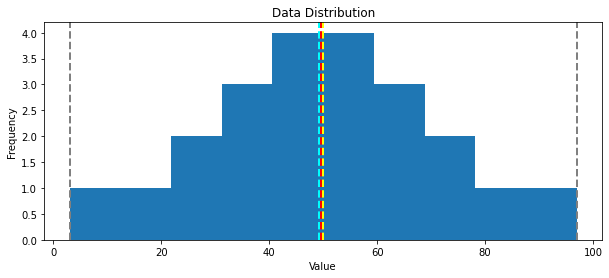

In [38]:
# Get the variable to examine
var = df_students['Grade']

# Get statistics
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        med_val,
                                                                                        mod_val,
                                                                                        max_val))

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var)

# Add lines for the statistics
plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()

For the grade data, the mean, median, and mode all seem to be more or less in the middle of the minimum and maximum, at around 50.

Another way to visualize the distribution of a variable is to use a *box* plot (sometimes called a *box-and-whiskers* plot). Let's create one for the grade data.

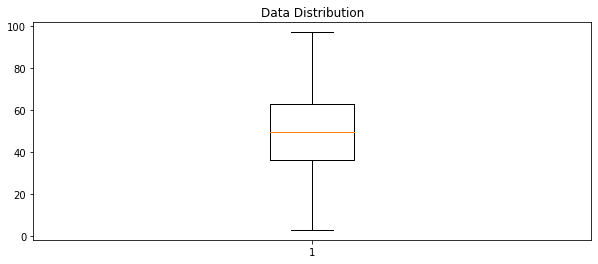

In [39]:
# Get the variable to examine
var = df_students['Grade']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.boxplot(var)

# Add titles and labels
plt.title('Data Distribution')

# Show the figure
fig.show()

The box plot shows the distribution of the grade values in a different format to the histogram. The *box* part of the plot shows where the inner two *quartiles* of the data reside - so in this case, half of the grades are between approximately 36 and 63. The *whiskers* extending from the box show the outer two quartiles; so the other half of the grades in this case are between 0 and 36 or 63 and 100. The line in the box indicates the *median* value.

It's often useful to combine histograms and box plots, with the box plot's orientation changed to align it with the histogram (in some ways, it can be helpful to think of the histogram as a "front elevation" view of the distribution, and the box plot as a "plan" view of the distribution from above.)

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



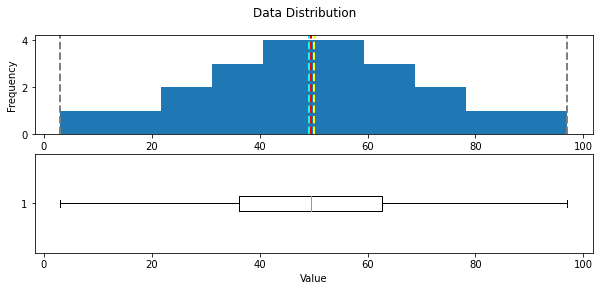

In [40]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

# Get the variable to examine
col = df_students['Grade']
# Call the function
show_distribution(col)

All of the measurements of central tendency are right in the middle of the data distribution, which is symmetric with values becoming progressively lower in both directions from the middle.

To explore this distribution in more detail, you need to understand that statistics is fundamentally about taking *samples* of data and using probability functions to extrapolate information about the full *population* of data. For example, the student data consists of 22 samples, and for each sample there is a grade value. You can think of each sample grade as a variable that's been randomly selected from the set of all grades awarded for this course. With enough of these random variables, you can calculate something called a *probability density function*, which estimates the distribution of grades for the full population.

The Pandas DataFrame class provides a helpful plot function to show this density.

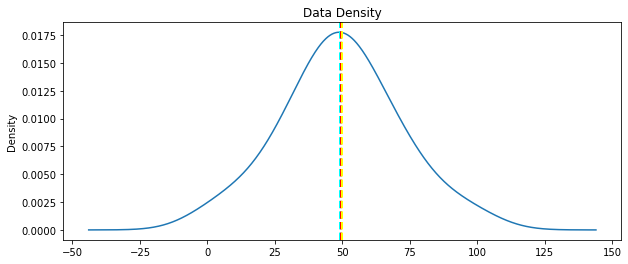

In [41]:
def show_density(var_data):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of Grade
col = df_students['Grade']
show_density(col)

As expected from the histogram of the sample, the density shows the characteristic 'bell curve" of what statisticians call a *normal* distribution with the mean and mode at the center and symmetric tails.

Now let's take a look at the distribution of the study hours data.

Minimum:1.00
Mean:10.52
Median:10.00
Mode:9.00
Maximum:16.00



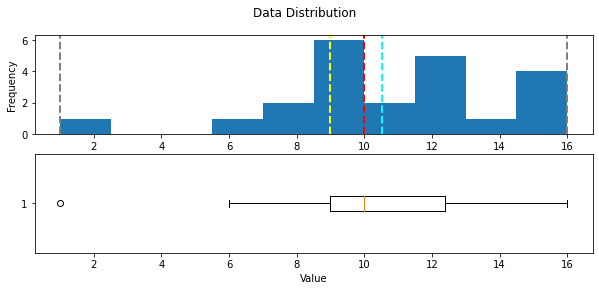

In [42]:
# Get the variable to examine
col = df_students['StudyHours']
# Call the function
show_distribution(col)

The distribution of the study time data is significantly different from that of the grades.

Note that the whiskers of the box plot only extend to around 6.0, indicating that the vast majority of the first quarter of the data is above this value. The minimum is marked with an **o**, indicating that it is statistically an *outlier* - a value that lies significantly outside the range of the rest of the distribution.

Outliers can occur for many reasons. Maybe a student meant to record "10" hours of study time, but entered "1" and missed the "0". Or maybe the student was abnormally lazy when it comes to studying! Either way, it's a statistical anomaly that doesn't represent a typical student. Let's see what the distribution looks like without it.

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



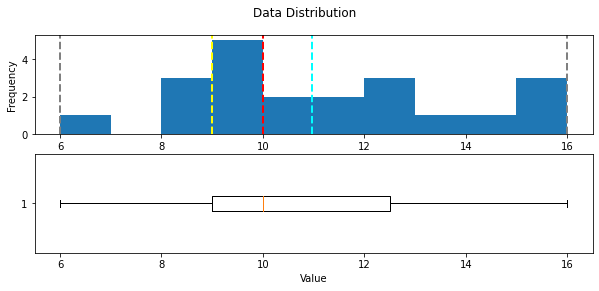

In [43]:
# Get the variable to examine
col = df_students[df_students.StudyHours>1]['StudyHours']
# Call the function
show_distribution(col)

With the outliers removed, the box plot shows all data within the four quartiles. Note that the distribution is not symmetric like it is for the grade data though - there are some students with very high study times of around 16 hours, but the bulk of the data is between 7 and 13 hours; The few extremely high values pull the mean towards the higher end of the scale.

Let's look at the density for this distribution.

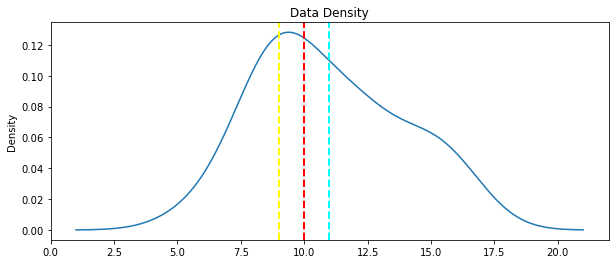

In [44]:
# Get the density of StudyHours
show_density(col)

This kind of distribution is called *right skewed*. The mass of the data is on the left side of the distribution, creating a long tail to the right because of the values at the extreme high end; which pull the mean to the right.

#### Measures of variance

So now we have a good idea where the middle of the grade and study hours data distributions are. However, there's another aspect of the distributions we should examine: how much variability is there in the data?

Typical statistics that measure variability in the data include:

- **Range**: The difference between the maximum and minimum. There's no built-in function for this, but it's easy to calculate using the **min** and **max** functions.
- **Variance**: The average of the squared difference from the mean. You can use the built-in **var** function to find this.
- **Standard Deviation**: The square root of the variance. You can use the built-in **std** function to find this.

In [45]:
for col_name in ['Grade','StudyHours']:
    col = df_students[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))


Grade:
 - Range: 94.00
 - Variance: 472.54
 - Std.Dev: 21.74

StudyHours:
 - Range: 15.00
 - Variance: 12.16
 - Std.Dev: 3.49


Of these statistics, the standard deviation is generally the most useful. It provides a measure of variance in the data on the same scale as the data itself (so grade points for the Grade distribution and hours for the StudyHours distribution). The higher the standard deviation, the more variance there is when comparing values in the distribution to the distribution mean - in other words, the data is more spread out.

When working with a *normal* distribution, the standard deviation works with the particular characteristics of a normal distribution to provide even greater insight. Run the cell below to see the relationship between standard deviations and the data in the normal distribution.

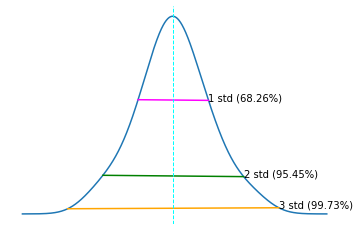

In [46]:
import scipy.stats as stats

# Get the Grade column
col = df_students['Grade']

# get the density
density = stats.gaussian_kde(col)

# Plot the density
col.plot.density()

# Get the mean and standard deviation
s = col.std()
m = col.mean()

# Annotate 1 stdev
x1 = [m-s, m+s]
y1 = density(x1)
plt.plot(x1,y1, color='magenta')
plt.annotate('1 std (68.26%)', (x1[1],y1[1]))

# Annotate 2 stdevs
x2 = [m-(s*2), m+(s*2)]
y2 = density(x2)
plt.plot(x2,y2, color='green')
plt.annotate('2 std (95.45%)', (x2[1],y2[1]))

# Annotate 3 stdevs
x3 = [m-(s*3), m+(s*3)]
y3 = density(x3)
plt.plot(x3,y3, color='orange')
plt.annotate('3 std (99.73%)', (x3[1],y3[1]))

# Show the location of the mean
plt.axvline(col.mean(), color='cyan', linestyle='dashed', linewidth=1)

plt.axis('off')

plt.show()

The horizontal lines show the percentage of data within 1, 2, and 3 standard deviations of the mean (plus or minus).

In any normal distribution:
- Approximately 68.26% of values fall within one standard deviation from the mean.
- Approximately 95.45% of values fall within two standard deviations from the mean.
- Approximately 99.73% of values fall within three standard deviations from the mean.

So, since we know that the mean grade is 49.8, the standard deviation is 21.47, and distribution of grades is approximately normal; we can calculate that 68.26% of students should achieve a grade between 28.33 and 71.27.

The descriptive statistics we've used to understand the distribution of the student data variables are the basis of statistical analysis; and because they're such an important part of exploring your data, there's a built-in **Describe** method of the DataFrame object that returns the main descriptive statistics for all numeric columns.

In [47]:
df_students.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


## Comparing data

Now that you know something about the statistical distribution of the data in your dataset, you're ready to examine your data to identify any apparent relationships between variables.

First of all, let's get rid of any rows that contain outliers so that we have a sample that is representative of a typical class of students. We identified that the StudyHours column contains some outliers with extremely low values, so we'll remove those rows.

In [48]:
df_sample = df_students[df_students['StudyHours']>1]
df_sample

,Name,StudyHours,Grade,Pass
3,Rosie,16.00,97.0,True
10,Francesca,15.50,82.0,True
9,Giovanni,14.50,74.0,True
14,Jenny,15.50,70.0,True
21,Aisha,12.00,64.0,True
20,Daniel,12.50,63.0,True
11,Rajab,13.75,62.0,True
6,Frederic,11.50,53.0,False
19,Skye,12.00,52.0,False
1,Joann,11.50,50.0,False


### Comparing numeric and categorical variables

The data includes two *numeric* variables (**StudyHours** and **Grade**) and two *categorical* variables (**Name** and **Pass**). Let's start by comparing the numeric **StudyHours** column to the categorical **Pass** column to see if there's an apparent relationship between the number of hours studied and a passing grade.

To make this comparison, let's create box plots showing the distribution of StudyHours for each possible Pass value (true and false).

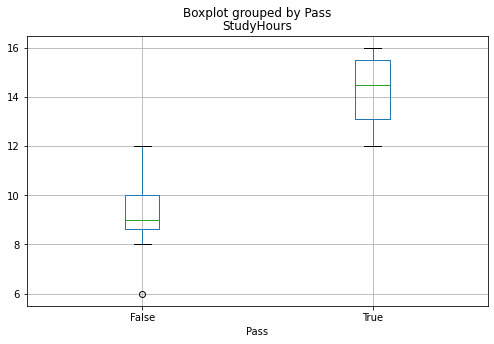

In [49]:
df_sample.boxplot(column='StudyHours', by='Pass', figsize=(8,5))

Comparing the StudyHours distributions, it's immediately apparent (if not particularly surprising) that students who passed the course tended to study for more hours than students who didn't. So if you wanted to predict whether or not a student is likely to pass the course, the amount of time they spend studying may be a good predictive feature.

### Comparing numeric variables

Now let's compare two numeric variables. We'll start by creating a bar chart that shows both grade and study hours.

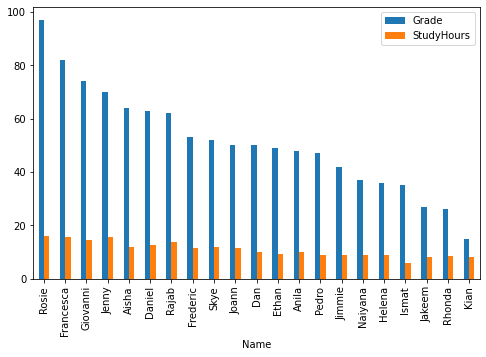

In [50]:
# Create a bar plot of name vs grade and study hours
df_sample.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(8,5))

The chart shows bars for both grade and study hours for each student; but it's not easy to compare because the values are on different scales. Grades are measured in grade points, and range from 3 to 97; while study time is measured in hours and ranges from 1 to 16.

A common technique when dealing with numeric data in different scales is to *normalize* the data so that the values retain their proportional distribution, but are measured on the same scale. To accomplish this, we'll use a technique called *MinMax* scaling that distributes the values proportionally on a scale of 0 to 1. You could write the code to apply this transformation; but the **Scikit-Learn** library provides a scaler to do it for you.

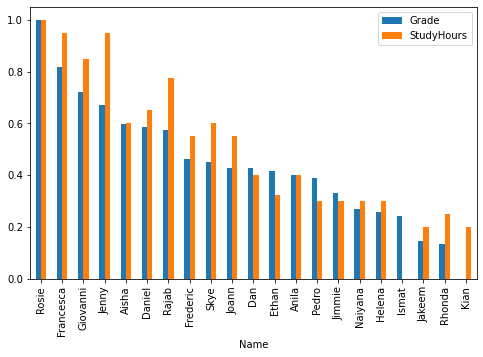

In [51]:
from sklearn.preprocessing import MinMaxScaler

# Get a scaler object
scaler = MinMaxScaler()

# Create a new dataframe for the scaled values
df_normalized = df_sample[['Name', 'Grade', 'StudyHours']].copy()

# Normalize the numeric columns
df_normalized[['Grade','StudyHours']] = scaler.fit_transform(df_normalized[['Grade','StudyHours']])

# Plot the normalized values
df_normalized.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(8,5))

With the data normalized, it's easier to see an apparent relationship between grade and study time. It's not an exact match, but it definitely seems like students with higher grades tend to have studied more.

So there seems to be a correlation between study time and grade; and in fact, there's a statistical *correlation* measurement we can use to quantify the relationship between these columns.

In [52]:
df_normalized.Grade.corr(df_normalized.StudyHours)

0.9117666413789675

The correlation statistic is a value between -1 and 1 that indicates the strength of a relationship. Values above 0 indicate a *positive* correlation (high values of one variable tend to coincide with high values of the other), while values below 0 indicate a *negative* correlation (high values of one variable tend to coincide with low values of the other). In this case, the correlation value is close to 1; showing a strongly positive correlation between study time and grade.

> **Note**: Data scientists often quote the maxim "*correlation* is not *causation*". In other words, as tempting as it might be, you shouldn't interpret the statistical correlation as explaining *why* one of the values is high. In the case of the student data, the statistics demonstrates that students with high grades tend to also have high amounts of study time; but this is not the same as proving that they achieved high grades *because* they studied a lot. The statistic could equally be used as evidence to support the nonsensical conclusion that the students studied a lot *because* their grades were going to be high.

Another way to visualise the apparent correlation between two numeric columns is to use a *scatter* plot.

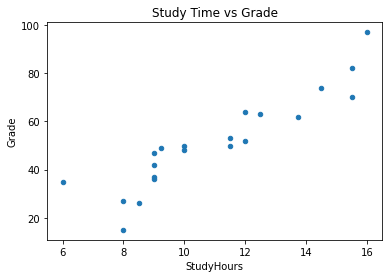

In [53]:
# Create a scatter plot
df_sample.plot.scatter(title='Study Time vs Grade', x='StudyHours', y='Grade')

Again, it looks like there's a discernible pattern in which the students who studied the most hours are also the students who got the highest grades.

We can see this more clearly by adding a *regression* line (or a *line of best fit*) to the plot that shows the general trend in the data. To do this, we'll use a statistical technique called *least squares regression*.

> **Warning - Math Ahead!**
>
> Cast your mind back to when you were learning how to solve linear equations in school, and recall that the *slope-intercept* form of a linear equation lookes like this:
>
> \begin{equation}y = mx + b\end{equation}
>
> In this equation, *y* and *x* are the coordinate variables, *m* is the slope of the line, and *b* is the y-intercept (where the line goes through the Y axis).
>
> In the case of our scatter plot for our student data, we already have our values for *x* (*StudyHours*) and *y* (*Grade*), so we just need to calculate the intercept and slope of the straight line that lies closest to those points. Then we can form a linear equation that calculates a new *y* value on that line for each of our *x* (*StudyHours*) values - to avoid confusion, we'll call this new *y* value *f(x)* (because it's the output from a linear equation ***f***unction based on *x*). The difference between the original *y* (*Grade*) value and the *f(x)* value is the *error* between our regression line and the actual *Grade* achieved by the student. Our goal is to calculate the slope and intercept for a line with the lowest overall error.
>
> Specifically, we define the overall error by taking the error for each point, squaring it, and adding all the squared errors together. The line of best fit is the line that gives us the lowest value for the sum of the squared errors - hence the name *least squares regression*.

Fortunately, you don't need to code the regression calculation yourself - the **SciPy** package includes a **stats** class that provides a **linregress** method to do the hard work for you. This returns (among other things) the coefficients you need for the slope equation - slope (*m*) and intercept (*b*) based on a given pair of variable samples you want to compare.

slope: 6.3134
y-intercept: -17.9164
so...
 f(x) = 6.3134x + -17.9164


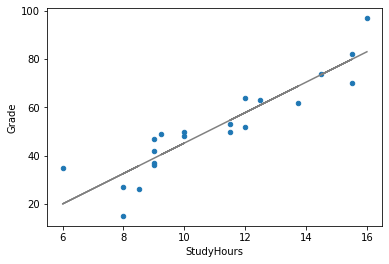

In [54]:
from scipy import stats

#
df_regression = df_sample[['Grade', 'StudyHours']].copy()

# Get the regression slope and intercept
m, b, r, p, se = stats.linregress(df_regression['StudyHours'], df_regression['Grade'])
print('slope: {:.4f}\ny-intercept: {:.4f}'.format(m,b))
print('so...\n f(x) = {:.4f}x + {:.4f}'.format(m,b))

# Use the function (mx + b) to calculate f(x) for each x (StudyHours) value
df_regression['fx'] = (m * df_regression['StudyHours']) + b

# Calculate the error between f(x) and the actual y (Grade) value
df_regression['error'] = df_regression['fx'] - df_regression['Grade']

# Create a scatter plot of Grade vs Salary
df_regression.plot.scatter(x='StudyHours', y='Grade')

# Plot the regression line
plt.plot(df_regression['StudyHours'],df_regression['fx'], color='gray')

# Display the plot
plt.show()

Note that this time, the code plotted two distinct things - the scatter plot of the sample study hours and grades is plotted as before, and then a line of best fit based on the least squares regression coefficients is plotted.

The slope and intercept coefficients calculated for the regression line are shown above the plot.

The line is based on the ***f*(x)** values calculated for each **StudyHours** value. Run the following cell to see a table that includes the following values:

- The **StudyHours** for each student.
- The **Grade** achieved by each student.
- The ***f(x)*** value calculated using the regression line coefficients.
- The *error* between the calculated ***f(x)*** value and the actual **Grade** value.

Some of the errors, particularly at the extreme ends, and quite large (up to over 17.5 grade points); but in general, the line is pretty close to the actual grades.

In [55]:
# Show the original x,y values, the f(x) value, and the error
df_regression[['StudyHours', 'Grade', 'fx', 'error']]

,StudyHours,Grade,fx,error
3,16.00,97.0,83.098400,-13.901600
10,15.50,82.0,79.941687,-2.058313
9,14.50,74.0,73.628262,-0.371738
14,15.50,70.0,79.941687,9.941687
21,12.00,64.0,57.844698,-6.155302
20,12.50,63.0,61.001410,-1.998590
11,13.75,62.0,68.893193,6.893193
6,11.50,53.0,54.687985,1.687985
19,12.00,52.0,57.844698,5.844698
1,11.50,50.0,54.687985,4.687985


### Using the regression coefficients for prediction

Now that you have the regression coefficients for the study time and grade relationship, you can use them in a function to estimate the expected grade for a given amount of study.

In [56]:
# Define a function based on our regression coefficients
def f(x):
    m = 6.3134
    b = -17.9164
    return m*x + b

study_time = 14

# Get f(x) for study time
prediction = f(study_time)

# Grade can't be less than 0 or more than 100
expected_grade = max(0,min(100,prediction))

#Print the estimated grade
print ('Studying for {} hours per week may result in a grade of {:.0f}'.format(study_time, expected_grade))

Studying for 14 hours per week may result in a grade of 70


So by applying statistics to sample data, you've determined a relationship between study time and grade; and encapsulated that relationship in a general function that can be used to predict a grade for a given amount of study time.

This technique is in fact the basic premise of machine learning. You can take a set of sample data that includes one or more *features* (in this case, the number of hours studied) and a known *label* value (in this case, the grade achieved) and use the sample data to derive a function that calculates predicted label values for any given set of features.

## Further Reading

To learn more about the Python packages you explored in this notebook, see the following documentation:

- [NumPy](https://numpy.org/doc/stable/)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/)
- [Matplotlib](https://matplotlib.org/contents.html)